baseline

In [2]:
# logistic regression 
# input normalized total energy, total particles 
# output label proton or pi

In [ ]:
import h5py
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Found 1 files for proton
data/continuous\step2point_ODD_proton_0.1to100GeV_theta6to174deg_phi0to360deg_posX0Y0Z0_10000ev_file1.h5
Found 1 files for piM
data/continuous\step2point_ODD_piM_0.1to100GeV_theta6to174deg_phi0to360deg_posX0Y0Z0_10000ev_file1.h5


In [17]:
dataset = dataset.dropna(subset=["detector_x"])
dataset = dataset.dropna(subset=["detector_y"])

In [ ]:
dataset["energy_hcal"]
dataset["hits_hcal"]
dataset["energy_ecal"]
dataset["hits_ecal"]
dataset["label"]

np.savez(
    "calo_dataset.npz",
    energy_hcal = dataset["energy_hcal"].cpu().numpy(),
    hits_hcal   = dataset["hits_hcal"].cpu().numpy(),
    energy_ecal = dataset["energy_ecal"].cpu().numpy(),
    hits_ecal   = dataset["hits_ecal"].cpu().numpy(),
    label       = dataset["label"].cpu().numpy(),
)




,event_id,detector_x,energy_hcal,hits_hcal,detector_y,energy_ecal,hits_ecal,energy_total,hits_total,hits_hcal/ecal,energy_hcal/ecal,label
0,0,HCal,0.620393,4213.0,ECal,0.019902,340.0,0.640295,4553.0,12.391176,31.171921,proton
1,1,HCal,0.064743,524.0,ECal,0.016818,152.0,0.081561,676.0,3.447368,3.849730,proton
2,2,HCal,0.592063,4126.0,ECal,0.489956,5580.0,1.082019,9706.0,0.739427,1.208398,proton
3,3,HCal,0.205269,1490.0,ECal,0.025372,333.0,0.230641,1823.0,4.474474,8.090532,proton
4,4,HCal,0.819567,5711.0,ECal,0.179291,2176.0,0.998858,7887.0,2.624540,4.571169,proton
...,...,...,...,...,...,...,...,...,...,...,...,...
19938,9995,HCal,0.533341,4188.0,ECal,0.907106,9339.0,1.440446,13527.0,0.448442,0.587959,piM
19939,9996,HCal,0.009815,148.0,ECal,0.048901,675.0,0.058716,823.0,0.219259,0.200713,piM
19940,9997,HCal,0.129968,1813.0,ECal,0.679347,6815.0,0.809315,8628.0,0.266031,0.191314,piM
19941,9998,HCal,0.052986,581.0,ECal,0.463509,5486.0,0.516495,6067.0,0.105906,0.114315,piM


In [18]:
summary = pd.DataFrame({
    "nan_count": dataset.isna().sum(),
    "min": dataset.min(numeric_only=True),
    "max": dataset.max(numeric_only=True)
})

print(summary)


                  nan_count           min           max
detector_x                0           NaN           NaN
detector_y                0           NaN           NaN
energy_ecal               0  1.521965e-05      2.585870
energy_hcal               0  7.181084e-08      1.565630
energy_hcal/ecal          0  1.853053e-07  54403.347656
energy_total              0  2.639825e-04      2.694235
event_id                  0  0.000000e+00   9999.000000
hits_ecal                 0  1.000000e+00  33606.000000
hits_hcal                 0  1.000000e+00  10199.000000
hits_hcal/ecal            0  1.862111e-04   5446.000000
hits_total                0  4.000000e+00  33671.000000
label                     0           NaN           NaN


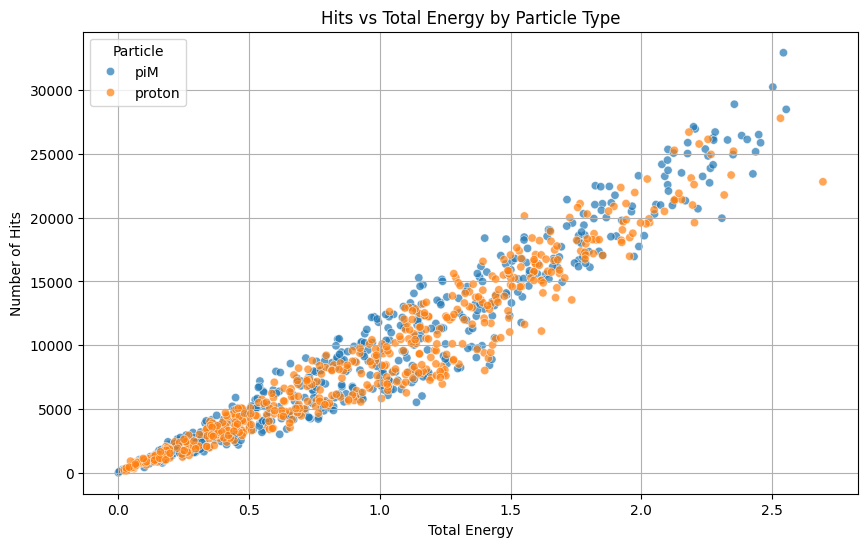

In [19]:
plot_data(dataset, sample_size=500)

Accuracy: 0.546760776405344

Confusion Matrix:
 [[ 959 1020]
 [ 778 1210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.48      0.52      1979
           1       0.54      0.61      0.57      1988

    accuracy                           0.55      3967
   macro avg       0.55      0.55      0.54      3967
weighted avg       0.55      0.55      0.55      3967



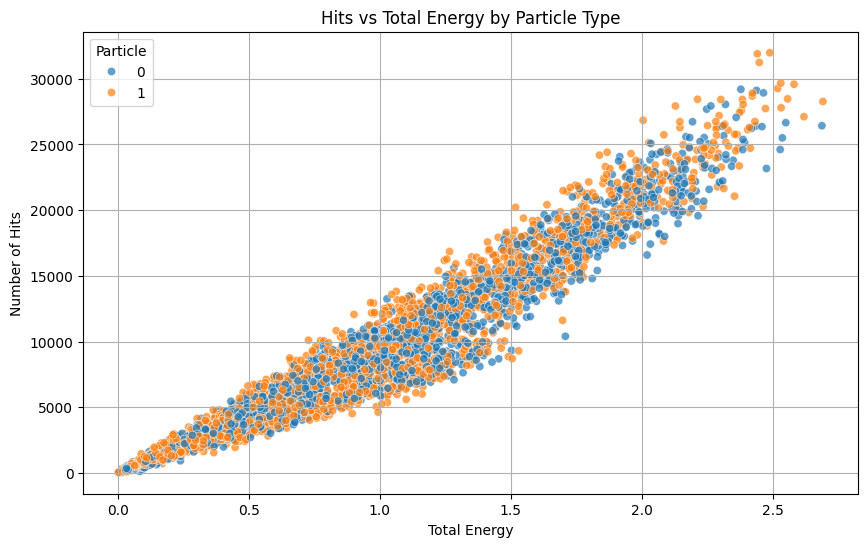

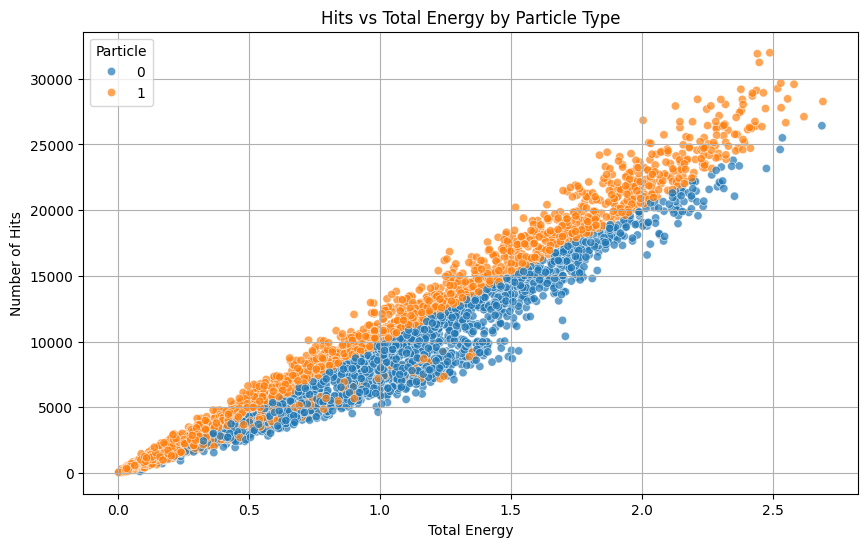

In [20]:
train_logistic_regression(dataset)

In [20]:
def explore_h5py_file(file_path):
    """Print the structure (groups, datasets) of an HDF5 file."""
    with h5py.File(file_path, "r") as f:
        def print_structure(name, obj):
            if isinstance(obj, h5py.Group):
                print(f"Group: {name}")
            elif isinstance(obj, h5py.Dataset):
                print(f"  Dataset: {name} | shape: {obj.shape} | dtype: {obj.dtype}")
        f.visititems(print_structure)


        sl = slice(None)
        steps_group = f["steps"]
        print(steps_group["subdetector"][:])


# Example usage
explore_h5py_file(f[3])

Group: metadata
  Dataset: metadata/random_seed | shape: () | dtype: uint64
  Dataset: metadata/subdetector_names | shape: (4,) | dtype: object
Group: particles
  Dataset: particles/event_id | shape: (21404586,) | dtype: int32
  Dataset: particles/id | shape: (21404586,) | dtype: int32
  Dataset: particles/parent_id | shape: (21404586,) | dtype: int32
Group: primary
  Dataset: primary/event_id | shape: (1000,) | dtype: int32
  Dataset: primary/momentum | shape: (1000, 3) | dtype: float32
  Dataset: primary/pdg | shape: (1000,) | dtype: int32
  Dataset: primary/vertex | shape: (1000, 3) | dtype: float32
Group: steps
  Dataset: steps/cell_id | shape: (20350639,) | dtype: uint64
  Dataset: steps/energy | shape: (20350639,) | dtype: float32
  Dataset: steps/event_id | shape: (20350639,) | dtype: int32
  Dataset: steps/mcparticle_id | shape: (20350639,) | dtype: int32
  Dataset: steps/pdg | shape: (20350639,) | dtype: int32
  Dataset: steps/position | shape: (20350639, 3) | dtype: float32
 

In [ ]:


# class NeuralNetwork(nn.Module):
   
#     def __init__(self, input_dim=4, output_dim=1):
#         super().__init__()
#         self.fully_connected_layers = nn.Sequential(
#             nn.Linear(in_features=4, out_features=32, bias=True),
#             nn.ReLU(),
#             nn.Linear(in_features=32, out_features=64, bias=True),
#             nn.ReLU(),
#             nn.Linear(in_features=64, out_features=1, bias=True), # binary classification
#         )

#     def forward(self, x):
#         logit = self.fully_connected_layers(x)
#         return logit



Epoch 1/100, Train Loss: 0.6720, Val Loss: 0.6713, Val Acc: 0.5829
Epoch 2/100, Train Loss: 0.6713, Val Loss: 0.6728, Val Acc: 0.5791
Epoch 3/100, Train Loss: 0.6720, Val Loss: 0.6769, Val Acc: 0.5703
Epoch 4/100, Train Loss: 0.6718, Val Loss: 0.6716, Val Acc: 0.5844
Epoch 5/100, Train Loss: 0.6717, Val Loss: 0.6712, Val Acc: 0.5904
Epoch 6/100, Train Loss: 0.6714, Val Loss: 0.6720, Val Acc: 0.5825
Epoch 7/100, Train Loss: 0.6712, Val Loss: 0.6721, Val Acc: 0.5854
Epoch 8/100, Train Loss: 0.6716, Val Loss: 0.6716, Val Acc: 0.5863
Epoch 9/100, Train Loss: 0.6714, Val Loss: 0.6718, Val Acc: 0.5769
Epoch 10/100, Train Loss: 0.6712, Val Loss: 0.6714, Val Acc: 0.5807
Epoch 11/100, Train Loss: 0.6713, Val Loss: 0.6710, Val Acc: 0.5841
Epoch 12/100, Train Loss: 0.6713, Val Loss: 0.6715, Val Acc: 0.5841
Epoch 13/100, Train Loss: 0.6713, Val Loss: 0.6708, Val Acc: 0.5832
Epoch 14/100, Train Loss: 0.6714, Val Loss: 0.6716, Val Acc: 0.5832
Epoch 15/100, Train Loss: 0.6713, Val Loss: 0.6719, Val A

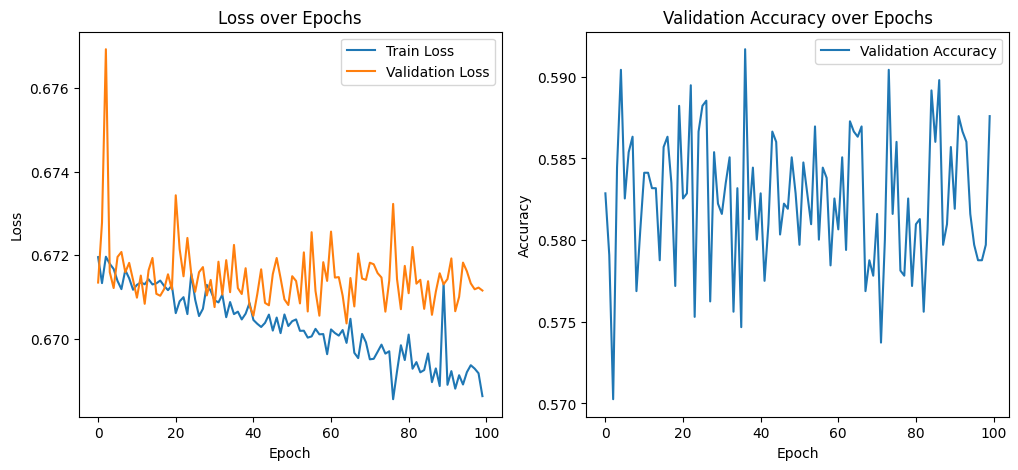

In [35]:
# Plot train & validation loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot validation accuracy
plt.subplot(1,2,2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()

plt.show()


In [ ]:
epochs = 20

for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_preds = torch.sigmoid(test_outputs) > 0.5
        accuracy = (test_preds.float() == y_test_tensor).float().mean()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}")


In [ ]:
epochs = 20
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

In [ ]:
with torch.no_grad():
    logits = model(X)
    probs = torch.sigmoid(logits)
    preds = (probs > 0.5).float()